> 式(1.67)

$$SNR=\frac{P_{av}A\sigma}{4\pi kT_eFLR^4}\frac{T_{sc}}{\Omega}$$

> 变式

$$P_{av}A=\frac{(SNR)4\pi kT_eFLR^4\Omega}{\sigma T_{sc}}$$

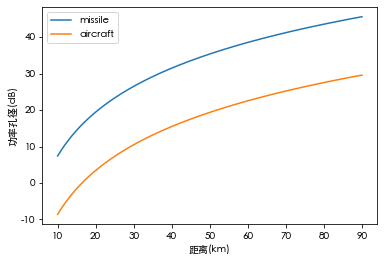

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Heiti TC']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


def from_dB(v):
    return 10 ** (v / 10)


def to_dB(v):
    return 10 * np.log10(v)


def from_rad(v):
    return v * 180 / np.pi


def to_rad(v):
    return v * np.pi / 180


def cal_PAP(SNR, sigma, F, L, R, T_sc, Omega, T_e=290):
    k = 1.38e-23
    return SNR * 4 * np.pi * k * T_e * F * L * R ** 4 * Omega / (sigma * T_sc)


rcs1, rcs2 = from_dB(6), from_dB(-10)  # 飞机、导弹的雷达横截面积
theA, theE = to_rad(360), to_rad(10)
Omega = theA * theE
T_sc = 2
F = from_dB(8)
L = from_dB(10)
SNR = from_dB(15)

r = np.linspace(10, 90, 1000)
PAP_aircraft = cal_PAP(SNR, rcs1, F, L, r * 1000, T_sc, Omega)
PAP_missile = cal_PAP(SNR, rcs2, F, L, r * 1000, T_sc, Omega)
PAP_aircraft, PAP_missile = to_dB(PAP_aircraft), to_dB(PAP_missile)
plt.plot(r, PAP_missile, label='missile')
plt.plot(r, PAP_aircraft, label='aircraft')
plt.xlabel('距离(km)')
plt.ylabel('功率孔径(dB)')
plt.legend()
plt.show()

In [21]:
r = 60e3
PAP_aircraft = cal_PAP(SNR, rcs1, F, L, r, T_sc, Omega)
PAP_missile = cal_PAP(SNR, rcs2, F, L, r, T_sc, Omega)
PAP_aircraft, PAP_missile = to_dB(PAP_aircraft), to_dB(PAP_missile)

print('PAP_aircraft:', '%.2f' % PAP_aircraft, 'dB')
print('PAP_missile:', '%.2f' % PAP_missile, 'dB')

PAP_aircraft: 22.53 dB
PAP_missile: 38.53 dB


导弹的PAP(功率孔径积)更大，所以以导弹的值为标准

In [22]:
r_max = 60e3
PAP = cal_PAP(SNR, rcs2, F, L, r, T_sc, Omega)
A_e = 1.75
P_av = PAP / A_e
print('P_av:','%.2f' % P_av,'w')

rou = 0.8
A = A_e/rou
print('Accurate A:','%.4f' % A, 'm^2')

P_av: 4074.56 w
Accurate A: 2.1875 m^2


> 式(1.40)

$$G=\frac{4\pi A_e}{\lambda^2}$$
> 式(1.43)

$$G=\frac{26000}{\theta_e\theta_a}  (degree)$$

$$\theta_a=\frac{26000\lambda^2}{4\pi A_e\theta_e}  (degree)$$

In [23]:
f0 = 2e9
c = 3e8
lamb = c / f0
G = 4 * np.pi * A_e / lamb ** 2
print('G:', '%.2f' % to_dB(G), 'dB')

the_a = 26000*lamb**2/(4*np.pi*A_e*from_rad(theE))
print('theta_a:','%.2f' % the_a, '°')
print('theta_a:','%.4f' % to_rad(the_a), 'rad')

G: 29.90 dB
theta_a: 2.66 °
theta_a: 0.0464 rad
